# Plan

1. Read data spreadsheet
2. Prepare features
3. Train a classification model
4. Compute model performance

# We will use `sklearn` library as a main library with ML tools and algos

In [5]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

## Predict if passenger `Survived`

In [6]:
df = pd.read_csv('titanic_data.csv')

In [7]:
df.head(3)

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No


## For our example we will use 2 features: `Passenger class` and `Sex`

In [ ]:
P(B|A) = P(B1, B2, B3,.... Bk|A) = [feature independance] = P(B1|A) * P(B2|A) ...

In [8]:
df[['Sex', 'Passenger Class', 'Survived']]

,Sex,Passenger Class,Survived
0,Female,First,Yes
1,Male,First,Yes
2,Female,First,No
3,Male,First,No
4,Female,First,No
...,...,...,...
1304,Female,Third,No
1305,Female,Third,No
1306,Male,Third,No
1307,Male,Third,No


In [9]:
clf = MultinomialNB()

clf.fit(df[['Sex', 'Passenger Class']], df['Survived'])

ValueError: could not convert string to float: 'Female'

## Need to convert categorical features to numerical (`sklearn` does not support it out of the box)

In [10]:
df['Sex'].value_counts()

Male      843
Female    466
Name: Sex, dtype: int64

In [11]:
df['Passenger Class'].value_counts()

Third     709
First     323
Second    277
Name: Passenger Class, dtype: int64

In [12]:
X = pd.DataFrame()

X['Sex'] = df['Sex'].map({
    'Male':0,
    'Female':1
})
X['Passenger Class'] = df['Passenger Class'].map({
    'First': 1,
    'Second': 2,
    'Third': 3
})

X['Survived'] = df['Survived'].map({
    'Yes': 1,
    'No': 0
})

y = X['Survived']
X = X.drop(['Survived'], axis=1)

In [ ]:
P(Survived) = P(Passenger Class=pclass|Survived) * P(Sex=sex|Survived)

## You could also use 

`sklearn.preprocessing.LabelEncoder` and `sklearn.preprocessing.OrdinalEncoder`

In [13]:
clf = MultinomialNB()

clf.fit(X, y)

MultinomialNB()

In [14]:
y_pred = clf.predict(X)

In [15]:
y_pred.shape

(1309,)

In [16]:
y.shape

(1309,)

In [17]:
X.shape

(1309, 2)

## Let's compute the accuracy of our algorithm by building a confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [19]:
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

In [20]:
print(tp)

339


In [21]:
print(tn)

682


In [22]:
print(fp)

127


In [23]:
print(fn)

161


In [24]:
print(precision_score(y, y_pred))

0.7274678111587983


In [25]:
print(recall_score(y, y_pred))

0.678


In [26]:
print(accuracy_score(y, y_pred))

0.7799847211611918


## Is it a good idea to use the same exact data for model training and model performance assessment? Why?

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66, random_state=5)

In [31]:
X_train.shape, X_test.shape

((863, 2), (446, 2))

In [29]:
clf = MultinomialNB()

clf.fit(X_train, y_train)

MultinomialNB()

In [32]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [36]:
import numpy as np

In [37]:
np.unique(y_train)

array([0, 1])

In [38]:
y_train

615     0
287     0
720     0
222     0
244     0
       ..
73      1
1142    0
998     0
206     0
867     1
Name: Survived, Length: 863, dtype: int64

In [39]:
y_train_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [33]:
print(f'Model performance on train data: {accuracy_score(y_train, y_train_pred)}')

Model performance on train data: 0.7879490150637312


In [34]:
print(f'Model performance on test data: {accuracy_score(y_test, y_test_pred)}')

Model performance on test data: 0.7645739910313901


## Typically you want to split your annotated data into 3 parts:

- `Train`: this part is used to fit the model (learn `model parameters`, e.g. probability distribution in Naive Bayes, weights in linear regression, thresholds in decision trees)
- `Validation`: this part is used to choose `model hyperparameters`, number of neighbours in KNN, regularization strength in linear models, tree depth in decision trees, etc.
- `Test`: this part is used to assess model performance and to compare it with other existing models. This part of the data should be never shown to the model other than in "predict" phase.


The split strategy might vary depending on the task specifics, e.g. 
- if one works with time-based data (predict stock price), the split should be time-based (you do not want to predict past from future)
- if you have multiple measurements from a single person, e.g. tumor size, you want to make your split based on unique subject ID and not based on individual measurements

# Questions

1. How to use Naive Bayes for continious (numerical) features?
2. How to use Naive Bayes if we want to predict a continious (numerical) target? (regression instead of classification)
3. Do we want to get probabilities instead of class labels? Yes/No and why?
4. How to interpret Naive Bayes model?

In [ ]:
P(Survived==1) = P(Passenger Class=pclass|Survived==1) * P(Sex=sex|Survived==1) / (P(Passenger Class) * P(Sex))
P(Survived==0) = P(Passenger Class=pclass|Survived==0) * P(Sex=sex|Survived==0) / (P(Passenger Class) * P(Sex))

In [40]:
y_pred_proba = clf.predict_proba(X_test)

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

In [42]:
y_pred_proba[:5]

array([[0.72251579, 0.27748421],
       [0.35006902, 0.64993098],
       [0.76864028, 0.23135972],
       [0.4073185 , 0.5926815 ],
       [0.76864028, 0.23135972]])

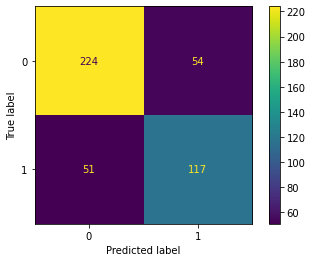

In [43]:
cm = confusion_matrix(y_test, y_pred_proba[:, 1]>0.5)
ConfusionMatrixDisplay(cm).plot();

## If I want to reduce number of False Positive, do I need to increase or decrease probability threshold?

In [ ]:
cm = confusion_matrix(y_test, y_pred_proba[:, 1]>0.7)
ConfusionMatrixDisplay(cm).plot();